<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Analytics - Regressão Linear</h1>

## Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [ ]:
dados = pd.read_csv('../Bases_originais\HousePrices_HalfMil.csv', sep=';')



## Visualizar os dados

In [ ]:
dados.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


## Verificando o tamanho do dataset

In [ ]:
dados.shape


(1000, 7)

Nossa base possui 7 colunas com 1000 linhas ao total. 

## Retira Duplicidade

In [ ]:
# Não houve duplicidade de dados
dados.drop_duplicates(inplace=True)
dados.shape

(1000, 7)


## Avaliando missing

In [ ]:
dados.isnull().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

Verificar os valores faltantes: É importante verificar se existem valores faltantes no dataset, pois isso pode influenciar na análise. Podemos fazer isso utilizando a função isnull.

Não houve valores nulos.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 62.5 KB


Nossa DataSet é formado somente por valores interios (int64).

## **Verificar a distribuição dos dados:** 
Para entender melhor a distribuição dos dados, podemos utilizar gráficos como histogramas e boxplots. Podemos fazer isso utilizando as funções hist e boxplot

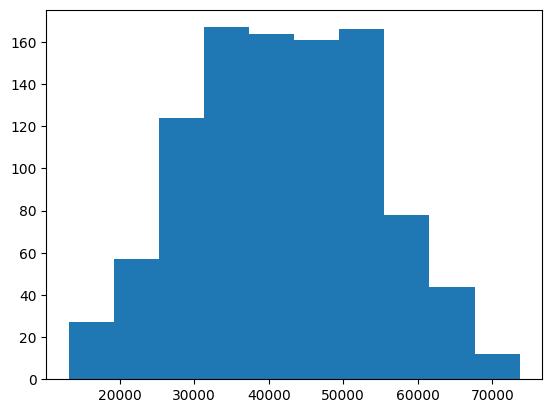

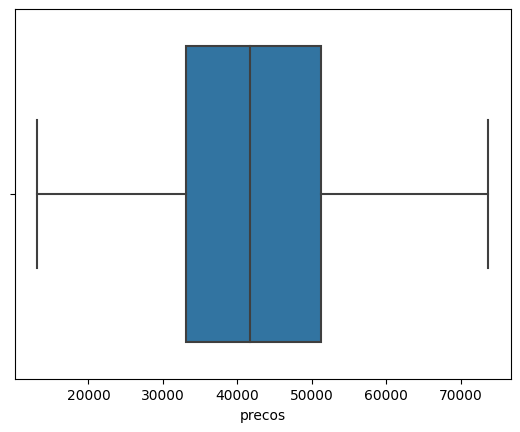

In [ ]:
plt.hist(dados['precos'])
plt.show()

sns.boxplot(x='precos', data=dados)
plt.show()


Observamos que nossa variavel resposta é uma distribuição normal, onde os valores estão estão concentrados no meio.

## Matriz de Correlação

Verificar a correlação entre as variáveis: Para entender melhor a correlação entre as variáveis, podemos utilizar a matriz de correlação e gráficos como heatmap.

No grafico podemos identificar as variaveis que possuem uma correlação forte nos ajudando na hora de tratar e treinar o nosso modelo.

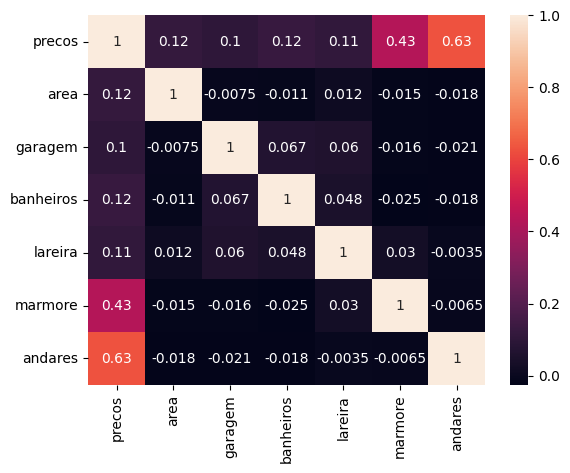

In [ ]:
correlacao = dados.corr()
sns.heatmap(correlacao, annot=True)
plt.show()


Podemos observar que:

As variaveis mais correlacionadas com a nossa dependente (precos) são "andares" e "marmore" de forma positiva.
 Conseguimos perceber que as variaveis explicativas que tem uma correlação forte são "area" e "garagem"

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


Verificar as estatísticas básicas dos dados: Para entender melhor os dados que estamos trabalhando, é importante verificar as estatísticas básicas dos dados, como média, desvio padrão, valor mínimo, valor máximo, entre outros. 

Verificamos que a nossa média de preços está em R$41.985,60 nosso desvio está em R$12.140,39 

# Análises gráficas

## Box plot da variável *dependente* (y)


<Axes: title={'center': 'Preço do imovel'}, ylabel='Preços'>

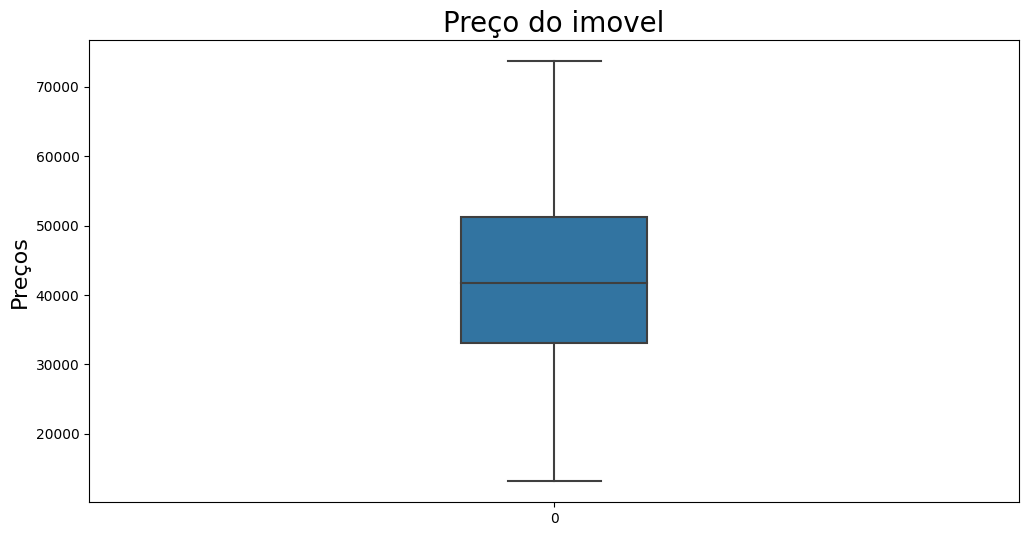

In [ ]:
ax = sns.boxplot(data=dados['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do imovel', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax

### Box-plot (Preço X Garagem)

<Axes: title={'center': 'imoveis com garagem'}, xlabel='Garagem', ylabel='Preços'>

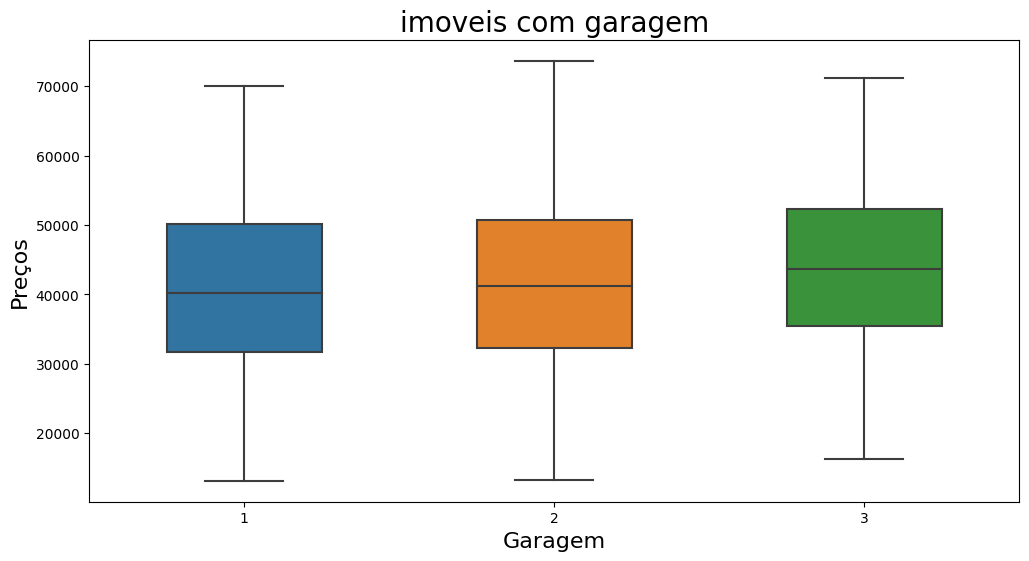

In [ ]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('imoveis com garagem', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Garagem', fontsize=16)
ax

Podemos verificar que os valores não tem uma mudança significativa tão forte quando tem 1 ou mais garagem no imovel. 

### Box-plot (Preço X Banheiros)

<Axes: title={'center': 'imoveis com banheiros'}, xlabel='banheiros', ylabel='Preços'>

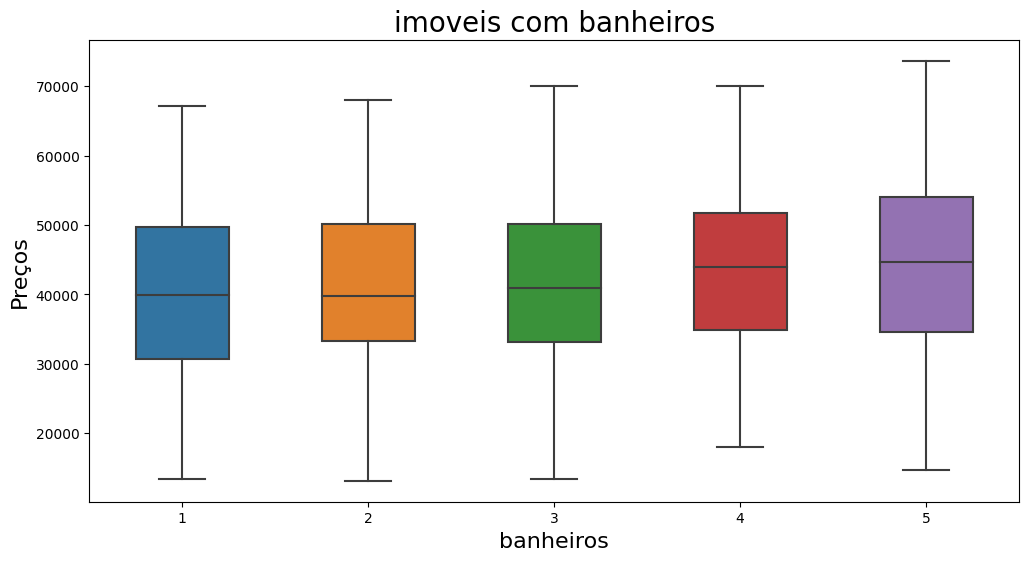

In [ ]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('imoveis com banheiros', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('banheiros', fontsize=16)
ax

Quando o imovel possue uma quantidade maior de banheiro o preço do imovel possue uma pequena crescente no valor porem ainda se matendo na nossa mediana. 

### Box-plot (Preço X Lareira)

<Axes: title={'center': 'imoveis com laleira'}, xlabel='laleira', ylabel='Preços'>

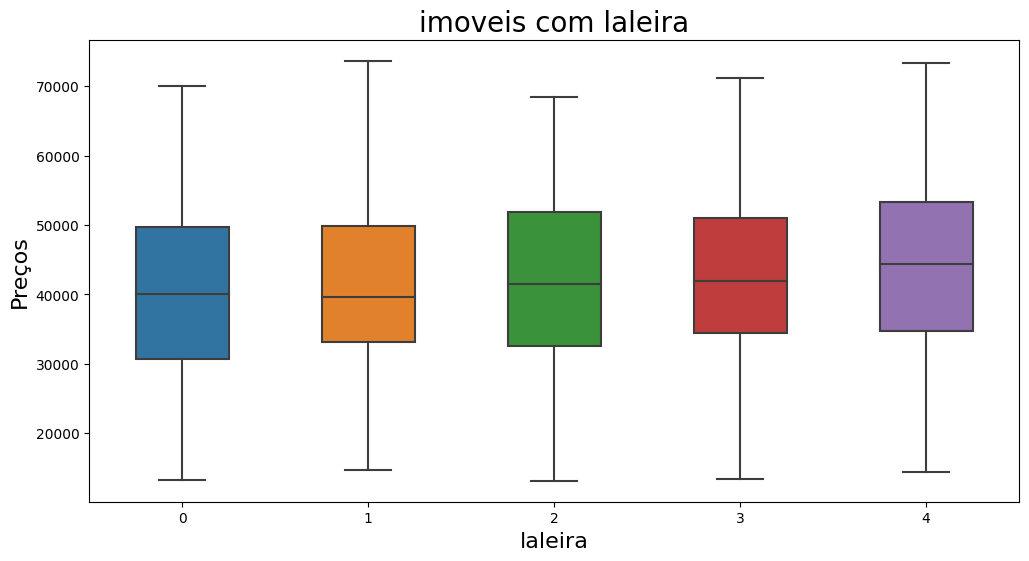

In [ ]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('imoveis com laleira', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('laleira', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'imoveis com marmore'}, xlabel='marmore', ylabel='Preços'>

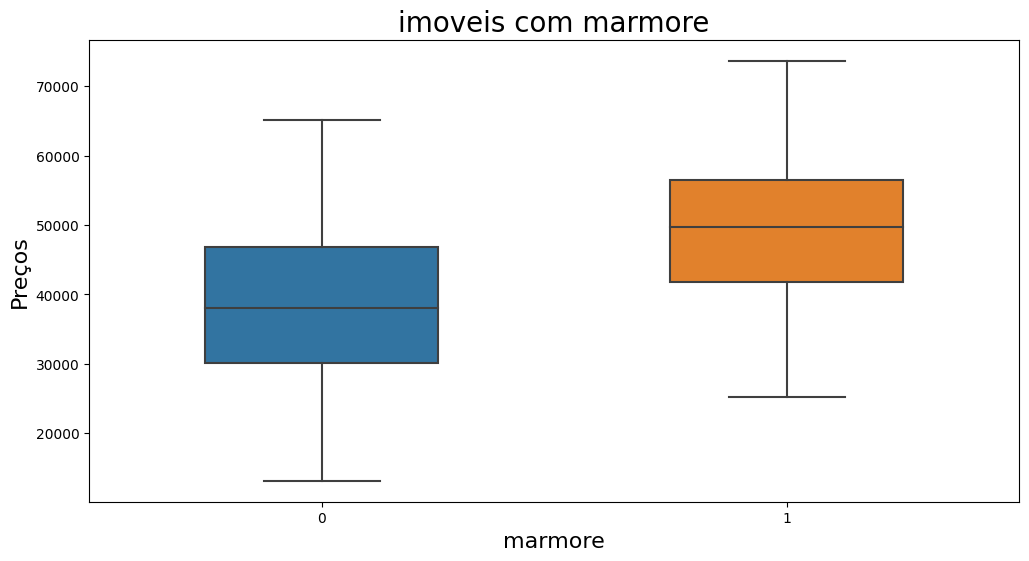

In [ ]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('imoveis com marmore', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('marmore', fontsize=16)
ax

Quando o imovel possue marmore vimos que temos uma crescente no valor da media. 

### Box-plot (Preço X Andares)

<Axes: title={'center': 'imoveis com andares'}, xlabel='andares', ylabel='Preços'>

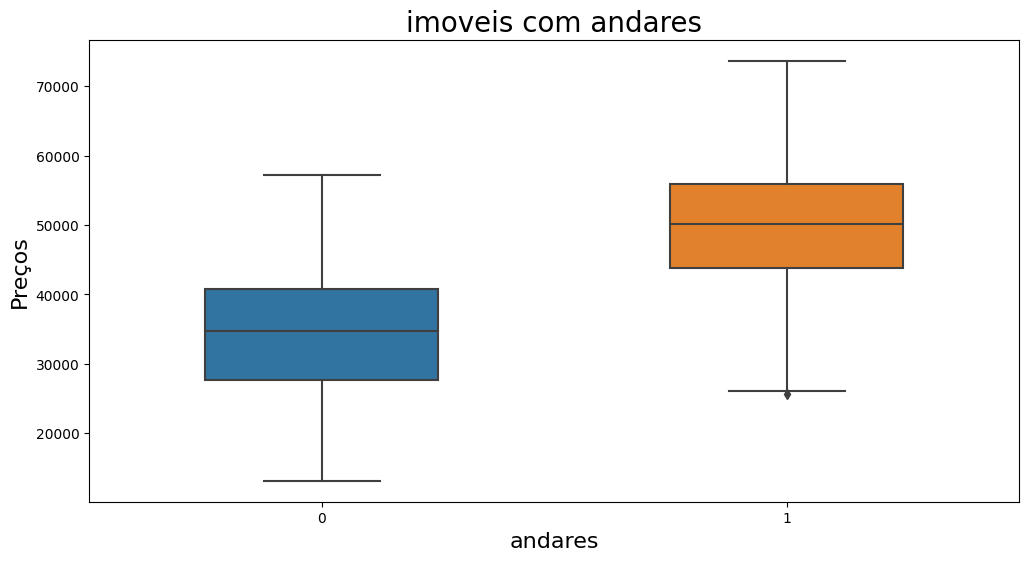

In [ ]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('imoveis com andares', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('andares', fontsize=16)
ax

Da mesma forma encontramos um aumento no valor medio da casa quando ela possui mais de um andar.

Ao analisar todas as variaveis verificamos que não possuimos Outilier. 

## Distribuição de frequências da variável *dependente* (y)


https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\gabri\AppData\Local\Temp\ipykernel_2064\2818276287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['precos'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='precos', ylabel='Valor do imovel (Preço)'>

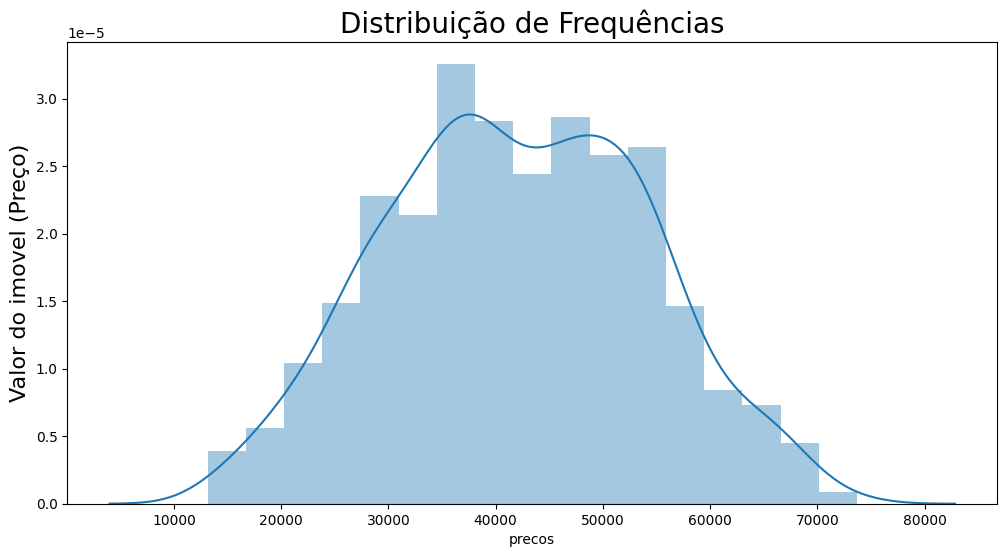

In [ ]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Valor do imovel (Preço)', fontsize=16)
ax

Vimos que o nosso dado dependente segue uma distribuição normal.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y



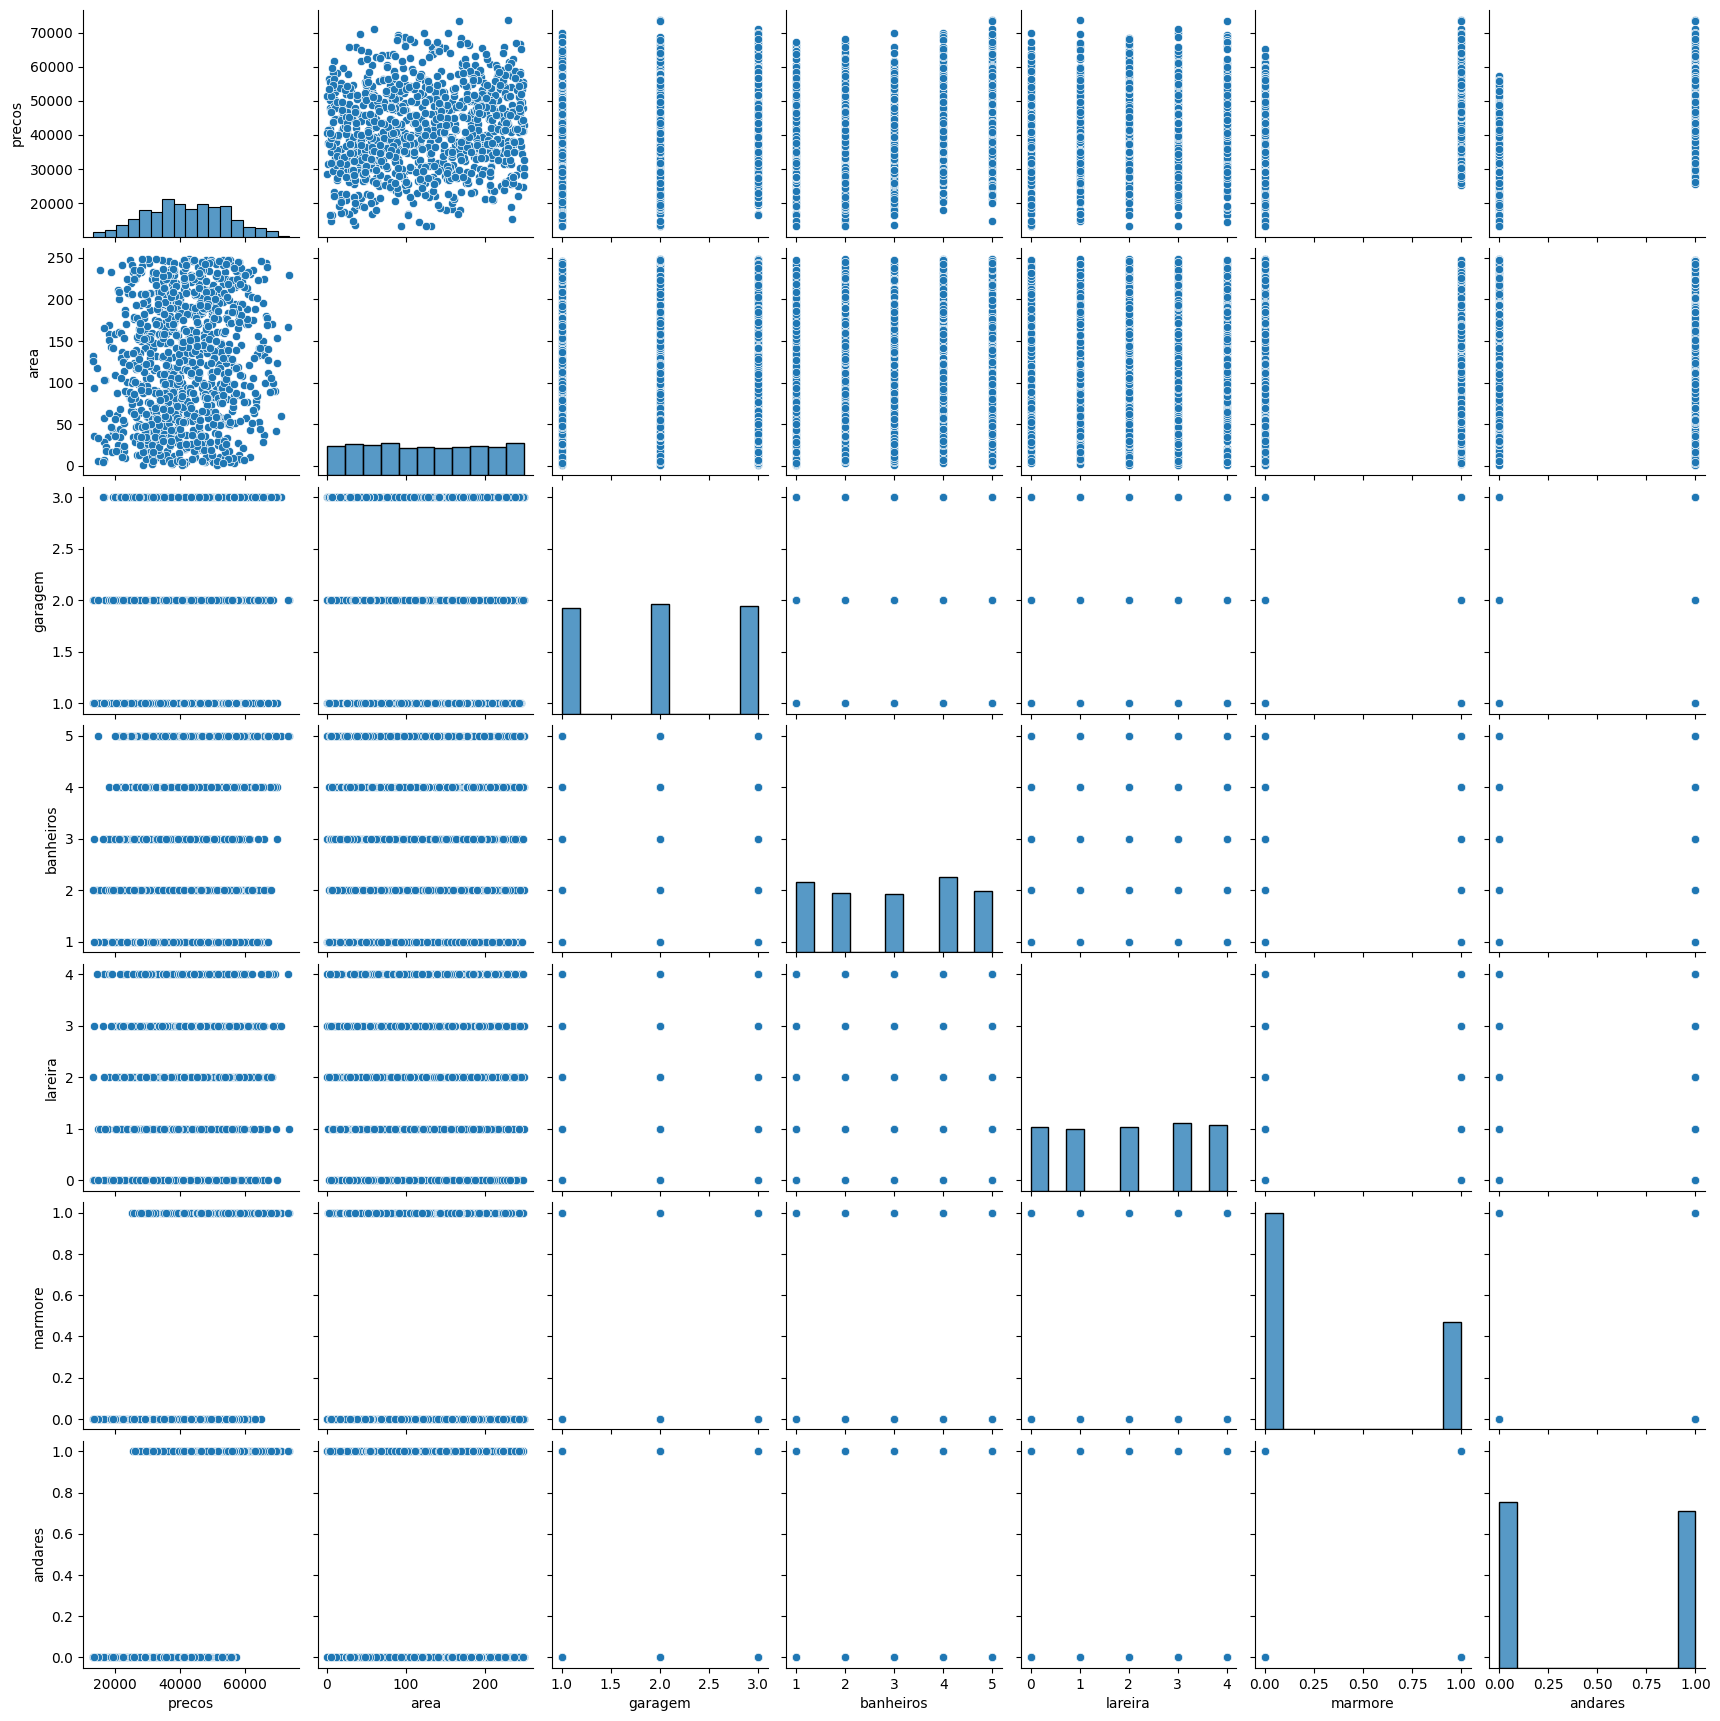

In [ ]:
ax = sns.pairplot(dados)

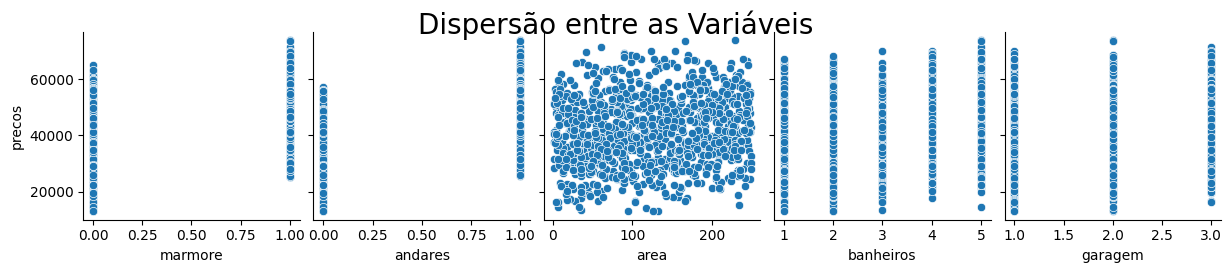

In [ ]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['marmore', 'andares', 'area', 'banheiros', 'garagem'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:

# Sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import _tree
from sklearn.model_selection import train_test_split


## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [ ]:
y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
x = dados[[ 'marmore', 'area', 'andares']]

Escolhi essas três variaveis para o nosso modelo pois são as que mais possuem correlação com nossa variavel resposta.

## Criando os datasets de treino e de teste

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x,y , test_size=0.3 , random_state=2811)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(700, 4)
(300, 4)


## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
modelo.score(x_train, y_train).round(2)

0.59

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
modelo.score(x_test, y_test).round(2)

0.65

In [ ]:
#Visualizando a coeficiente angular 
modelo.coef_
# Aqui encontramos os valores de B1, B2...

array([11063.18525672,    24.30183863, 14872.3881766 ])

In [ ]:
# Coeficiente Linear
modelo.intercept_

# O intercept é o nosso Valor do B0.

27995.405656517236

##Avaliando o erro

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(x_test).round(5)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

6032.939553166668
53633924.94350558


Nosso Erro da regressão Linear se encontra em 60.32 e o nosso erro medio quadratico está em 53.63

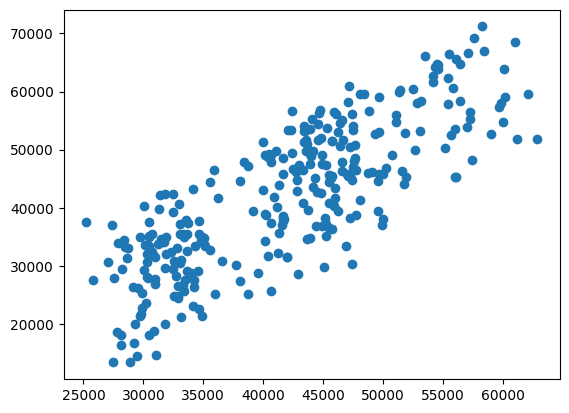

In [ ]:
#Visualizando a relação do y_test com o t_pred

fig,ax = plt.subplots()

ax.scatter(y_pred , y_test)

plt.show()

## K-NN

##Importe as bibliotecas necessárias:


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score as r2 
from sklearn.preprocessing import MinMaxScaler

Separando os dados em recursos 

In [ ]:
X = dados.drop('precos', axis=1)
y = dados['precos']


In [ ]:
padrao = MinMaxScaler()
x_pad = padrao.fit_transform(x)

Divida os dados em conjuntos de treinamento e teste:


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.3, random_state=5502)


# Treinando e fazendo as predições do modelo.

In [ ]:
for vizinhos in list (range(1,21)):

    model = KNeighborsRegressor(n_neighbors=vizinhos)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2_score = r2(y_test, y_pred)
    print('vizinhos: ', vizinhos, 'r2_score: ', (r2_score*100).round(2))


vizinhos:  1 r2_score:  26.07
vizinhos:  2 r2_score:  40.97
vizinhos:  3 r2_score:  46.83
vizinhos:  4 r2_score:  51.35
vizinhos:  5 r2_score:  54.06
vizinhos:  6 r2_score:  56.4
vizinhos:  7 r2_score:  55.51
vizinhos:  8 r2_score:  56.56
vizinhos:  9 r2_score:  57.86
vizinhos:  10 r2_score:  57.53
vizinhos:  11 r2_score:  57.6
vizinhos:  12 r2_score:  57.39
vizinhos:  13 r2_score:  57.81
vizinhos:  14 r2_score:  58.43
vizinhos:  15 r2_score:  58.74
vizinhos:  16 r2_score:  58.65
vizinhos:  17 r2_score:  58.74
vizinhos:  18 r2_score:  58.72
vizinhos:  19 r2_score:  58.61
vizinhos:  20 r2_score:  58.57


#Com o numero de vizinho igual a 13 conseguimos chegar no valor do erro quadratico de 58.72

Avaliando o desempenho do modelo

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 8071.114156295792


## Arvore de Decisão.

In [ ]:
from sklearn.tree import DecisionTreeRegressor 


In [ ]:
for profundidade in list (range(1,11)):
    
    model= DecisionTreeRegressor(max_depth=profundidade)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2_score = r2(y_test, y_pred).round(4)
    print('Profundudade: ', profundidade, 'r2_score: ', (r2_score*100).round(2))

Profundudade:  1 r2_score:  40.6
Profundudade:  2 r2_score:  59.09
Profundudade:  3 r2_score:  61.78
Profundudade:  4 r2_score:  58.35
Profundudade:  5 r2_score:  56.52
Profundudade:  6 r2_score:  54.36
Profundudade:  7 r2_score:  50.48
Profundudade:  8 r2_score:  46.63
Profundudade:  9 r2_score:  42.47
Profundudade:  10 r2_score:  39.55


Verificando a nossa arvore foi visto que a profundidade 4 tem o maior score (61.78)

## Conclusão dos modelos.

Realizando as analises e estimulando os modelos conseguimos entender que a base de dados possue dados simetricos com isso conseguimos realizar um modelo de regressão linear e comparando nossa coeficiente  R²-quadrado.

nossas metricas foram:

Arvore de decisão - Profundudade:  5 R2_score:  61.78;

K-NN - vizinhos:  13 R2_score:  57.31;

Regressão Linear - 65.00;

Sendo ela possuindo o nosso maior erro  R² 

Regressão linear  R² - 65.00

Vimos que o nosso modelo de regressão Linear é o nosso melhor modelo pois tem o maior Score de  R² 65.00

